In [1]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import BatchNormalization
%matplotlib inline

In [2]:
start = dt.datetime(2013,1,1)
end = dt.datetime(2019,12,31)
stk_data = gh(symbol='SBIN',start=start,end=end)

In [3]:
stk_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2013-01-01,SBIN,EQ,2385.50,2404.90,2434.05,2397.55,2425.30,2426.45,2423.75,1720230,4.169403e+14,64215,662638,0.3852
2013-01-02,SBIN,EQ,2426.45,2450.00,2464.00,2438.15,2451.90,2450.55,2453.53,1466012,3.596900e+14,61823,508795,0.3471
2013-01-03,SBIN,EQ,2450.55,2460.00,2482.40,2436.20,2470.70,2471.60,2465.12,2010309,4.955653e+14,71411,820537,0.4082
2013-01-04,SBIN,EQ,2471.60,2460.00,2492.95,2450.65,2490.00,2486.70,2475.69,1370595,3.393164e+14,62637,231546,0.1689
2013-01-07,SBIN,EQ,2486.70,2490.00,2499.00,2461.75,2465.00,2467.60,2481.24,1026449,2.546866e+14,48683,269798,0.2628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,SBIN,EQ,332.40,333.20,334.20,329.20,331.95,331.45,331.35,21747782,7.206207e+14,134272,3189916,0.1467
2019-12-26,SBIN,EQ,331.45,333.00,333.45,328.10,330.20,329.85,330.09,24616942,8.125696e+14,139034,4426825,0.1798
2019-12-27,SBIN,EQ,329.85,333.40,338.35,333.00,337.20,337.25,336.68,33477173,1.127106e+15,209260,5093786,0.1522


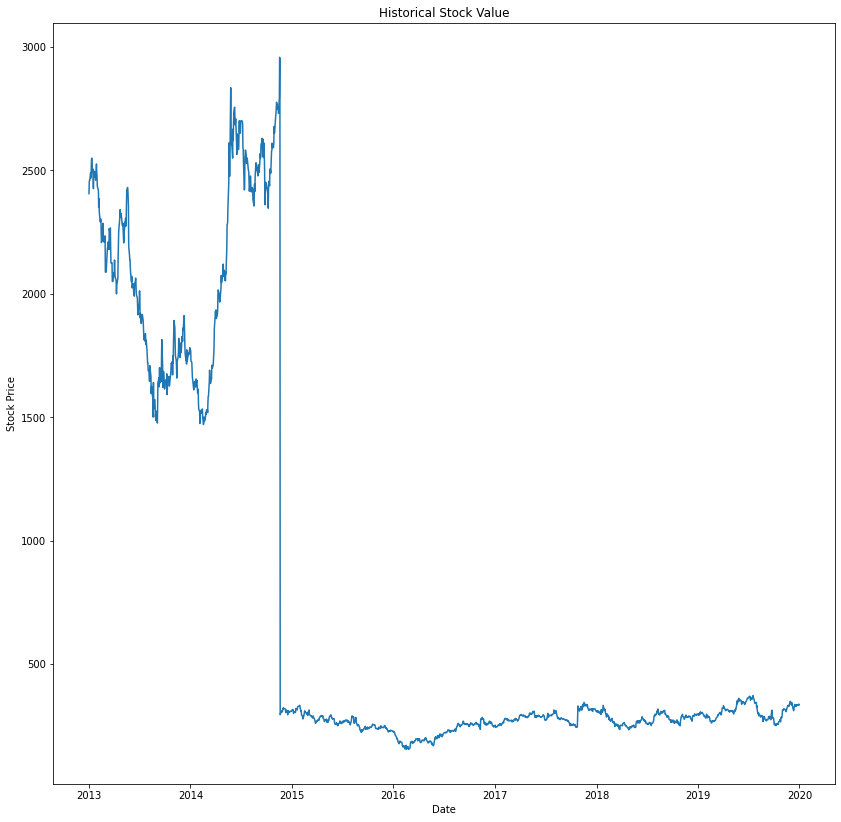

In [8]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Open'])
plt.title('Historical Stock Value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [5]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [6]:
data2

,Date,Open,High,Low,Close
Date,,,,,
2013-01-01,2013-01-01,2404.90,2434.05,2397.55,2426.45
2013-01-02,2013-01-02,2450.00,2464.00,2438.15,2450.55
2013-01-03,2013-01-03,2460.00,2482.40,2436.20,2471.60
2013-01-04,2013-01-04,2460.00,2492.95,2450.65,2486.70
2013-01-07,2013-01-07,2490.00,2499.00,2461.75,2467.60
...,...,...,...,...,...
2019-12-24,2019-12-24,333.20,334.20,329.20,331.45
2019-12-26,2019-12-26,333.00,333.45,328.10,329.85
2019-12-27,2019-12-27,333.40,338.35,333.00,337.25


In [7]:
len(data2)

1728

In [23]:
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [24]:
len(training_set_scaled)

1728

In [25]:
regressor = Sequential()
regressor.add(LSTM(units = 128, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.15))
regressor.add(LSTM(units = 64))
regressor.add(Dropout(0.15))
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 10)

Epoch 1/100
167/167 [==============================] - 3s 10ms/step - loss: 0.0072
Epoch 2/100
167/167 [==============================] - 2s 10ms/step - loss: 0.0030
Epoch 3/100
167/167 [==============================] - 2s 10ms/step - loss: 0.0027
Epoch 4/100
167/167 [==============================] - 2s 10ms/step - loss: 0.0026
Epoch 5/100
167/167 [==============================] - 2s 10ms/step - loss: 0.0021
Epoch 6/100
167/167 [==============================] - 2s 10ms/step - loss: 0.0022
Epoch 7/100
167/167 [==============================] - 2s 10ms/step - loss: 0.0022
Epoch 8/100
167/167 [==============================] - 2s 10ms/step - loss: 0.0019
Epoch 9/100
167/167 [==============================] - 2s 10ms/step - loss: 0.0016
Epoch 10/100
167/167 [==============================] - 2s 9ms/step - loss: 0.0017
Epoch 11/100
167/167 [==============================] - 2s 9ms/step - loss: 0.0014
Epoch 12/100
167/167 [==============================] - 2s 9ms/step - loss: 0.0015
Epoc

In [27]:
dayy =dt.datetime.now().day
monthh = dt.datetime.now().month
yearr = dt.datetime.now().year
testdataframe= gh(symbol='SBIN',start=dt.datetime(2020,1,1),end=dt.datetime(yearr,monthh,dayy))
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
print(len(inputs))

599


In [28]:
print(len(data2))
print(len(testdata))
print(len(dataset_total))
print(len(inputs))
print(dayy)
print(monthh)
print(yearr)

1728
539
2267
599
26
2
2022


In [29]:
X_test = []
for i in range(60, len(inputs)+1):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [30]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

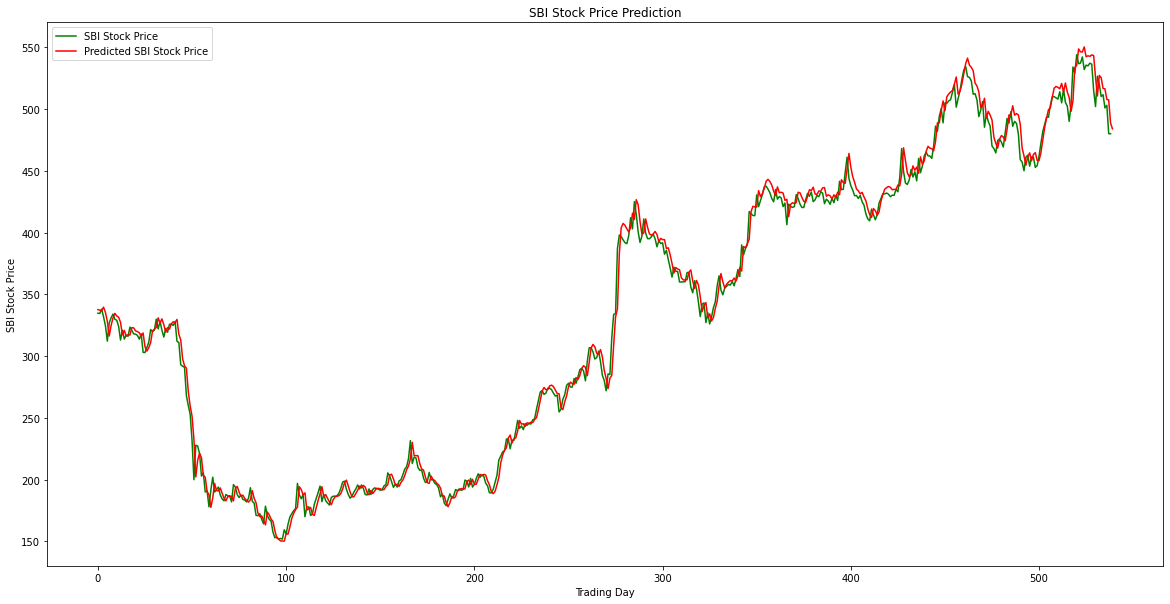

In [31]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'SBI Stock Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted SBI Stock Price')
plt.title('SBI Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('SBI Stock Price')
plt.legend()
plt.show()

In [32]:
print(testdata.iloc[-1])
print(predicted_stock_price[-1])
print(len(real_stock_price))
print(real_stock_price[:10])
print(len(predicted_stock_price))
print(predicted_stock_price[:10])

Date     2022-02-25
Open          480.0
High          491.9
Low           479.3
Close        482.95
Name: 2022-02-25, dtype: object
[483.9386]
539
[[334.7 ]
 [334.5 ]
 [337.95]
 [331.7 ]
 [324.45]
 [312.1 ]
 [326.9 ]
 [331.  ]
 [334.  ]
 [329.8 ]]
540
[[337.60968]
 [337.19037]
 [336.98157]
 [339.61523]
 [335.28372]
 [328.11356]
 [316.28503]
 [324.81866]
 [330.81662]
 [334.5876 ]]


In [33]:
print(testdata)

                  Date    Open    High     Low   Close
Date                                                  
2020-01-01  2020-01-01  334.70  335.95  332.15  334.45
2020-01-02  2020-01-02  334.50  339.85  333.35  339.30
2020-01-03  2020-01-03  337.95  337.95  332.00  333.70
2020-01-06  2020-01-06  331.70  331.70  317.70  319.00
2020-01-07  2020-01-07  324.45  327.00  315.40  318.40
...                ...     ...     ...     ...     ...
2022-02-21  2022-02-21  511.55  517.50  504.65  511.85
2022-02-22  2022-02-22  500.90  505.30  495.50  498.40
2022-02-23  2022-02-23  503.00  505.35  497.25  498.70
2022-02-24  2022-02-24  480.00  487.95  468.00  472.65
2022-02-25  2022-02-25  480.00  491.90  479.30  482.95

[539 rows x 5 columns]


In [131]:
X_test

array([[[ 0.03533254],
        [ 0.03693856],
        [ 0.0344403 ],
        ...,
        [ 0.06366994],
        [ 0.06522243],
        [ 0.06402684]],

       [[ 0.03693856],
        [ 0.0344403 ],
        [ 0.03394065],
        ...,
        [ 0.06522243],
        [ 0.06402684],
        [ 0.06413391]],

       [[ 0.0344403 ],
        [ 0.03394065],
        [ 0.03676011],
        ...,
        [ 0.06402684],
        [ 0.06413391],
        [ 0.06406253]],

       ...,

       [[-0.00107068],
        [-0.00092793],
        [-0.00108853],
        ...,
        [ 0.01463267],
        [ 0.01802316],
        [ 0.01713093]],

       [[-0.00092793],
        [-0.00108853],
        [ 0.00158818],
        ...,
        [ 0.01802316],
        [ 0.01713093],
        [ 0.01550706]],

       [[-0.00108853],
        [ 0.00158818],
        [ 0.00039258],
        ...,
        [ 0.01713093],
        [ 0.01550706],
        [ 0.0138475 ]]])